In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

data = pd.read_csv('Survey Dataset - BMS_Amazon - Sheet1.csv', parse_dates=True, index_col='Sr. No.')
data.dropna(inplace=True)
data = data.apply(lambda x: x.astype(str).str.upper())
data['DOB'] = pd.to_datetime(data['DOB']).dt.strftime('%m-%d-%y')
#data[~data.Sport.isin(['CRICKET', 'FOOTBALL', 'NEITHER', 'BOTH'])]['Sport'].apply(lambda x : x.replace(x, 'NEITHER'))
#data[~data.Food_Pref.isin(['VEG', 'NON VEG'])]['Food_Pref'].apply(lambda x : x.replace(x, 'NON VEG'))
data['Food_Pref'] = data['Food_Pref'].str.upper().replace(to_replace='NON-VEG',value='NON VEG')
now = datetime.now()
year_now = now.year
tf = pd.DatetimeIndex(data['DOB']).year
data['age'] = year_now - tf
print(data)

                Full Name       DOB Work_Exp Voucher_Pref       Sport  \
Sr. No.                                                                 
1             RAHUL RAWAT  05-10-90      4.5       AMAZON     CRICKET   
2            YOGITA PATIL  12-01-98      0.0       AMAZON      CARROM   
3          PRADNYA KAMBLI  11-24-84     11.0       AMAZON     CRICKET   
4            NIKITA PATIL  11-24-92      2.0          BMS     CRICKET   
5          MELITA WESSELY  12-27-93      2.0       AMAZON     CRICKET   
6          SHARANG BHOITE  10-14-92      3.0       AMAZON        BOTH   
7             ANAJI KADAM  03-17-97      0.0       AMAZON     CRICKET   
8            MEGHAV KUMAR  07-27-84     12.0       AMAZON        BOTH   
9            NIKHIL PAWAR  12-04-92      5.0       AMAZON     CRICKET   
10          SONAL BADODIA  02-12-93      4.0       AMAZON  BASKETBALL   
11           SHYAM SHINDE  01-26-98      0.0       AMAZON    FOOTBALL   
12           SUYOG THAKUR  12-25-96      0.0       

In [10]:
data = data.apply(lambda x: x.astype(str).str.upper())
sample = data[~data.Sport.isin(['CRICKET', 'FOOTBALL', 'NEITHER', 'BOTH'])]['Sport']
as_list = sample.index.tolist()
for i in as_list:
    data['Sport'][i] = 'NEITHER'

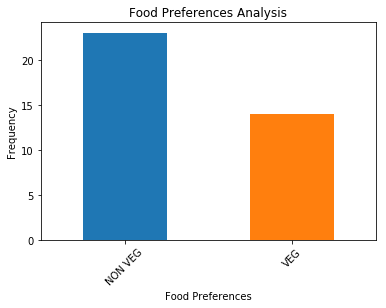

In [3]:
#plt.hist(data['Food_Pref'])
data['Food_Pref'].value_counts().plot(kind='bar')
plt.xlabel('Food Preferences')
plt.ylabel('Frequency')
plt.title('Food Preferences Analysis')
plt.xticks(rotation = 45)
plt.show()



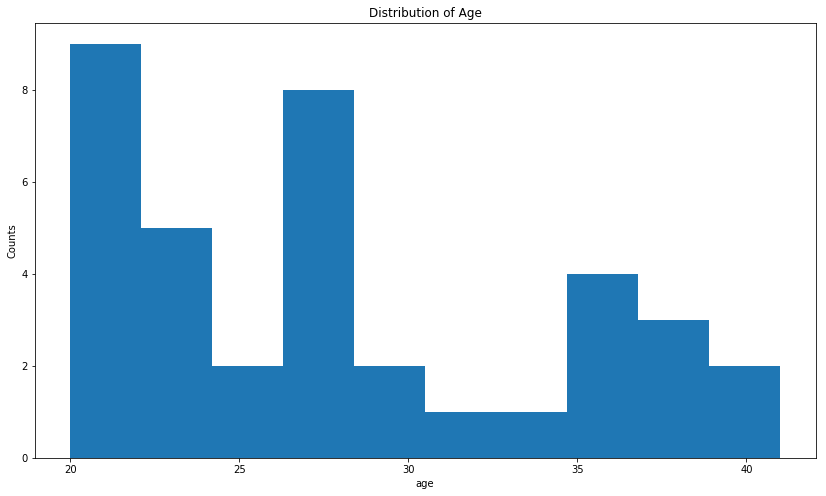

In [4]:
#age Distribution on histogram
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize = (14,8))
plt.hist(data['age'])
plt.title('Distribution of Age')
plt.xlabel('age')
plt.ylabel('Counts')
plt.show()

14
23


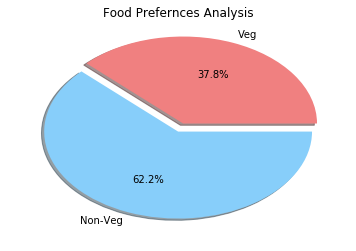

In [5]:
import matplotlib.pyplot as plt
x = data[data['Food_Pref'] == 'VEG']
print(len(x))
y = data[data['Food_Pref'] == 'NON VEG']
print(len(y))
labels = ["Veg","Non-Veg"]
sizes = [len(x),len(y)]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)
plt.title('Food Prefernces Analysis')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)
plt.show()

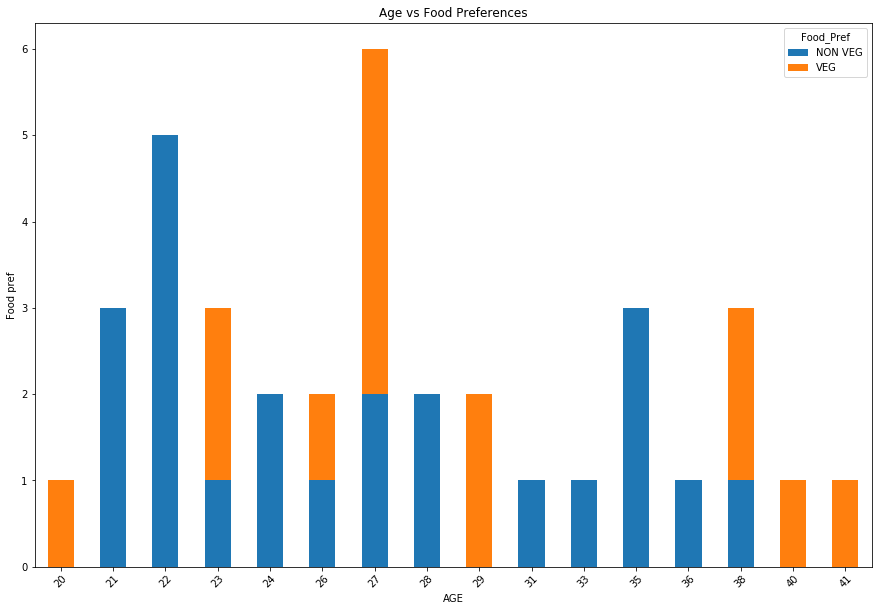

In [6]:
#Bar chart for age and food pref
re=data.groupby(['age','Food_Pref'])['Food_Pref'].count()
re.unstack().plot(kind='bar', stacked=True, figsize=(15,10))
plt.xlabel('AGE')
plt.ylabel('Food pref')
plt.title('Age vs Food Preferences')
plt.xticks(rotation=45)
plt.show()

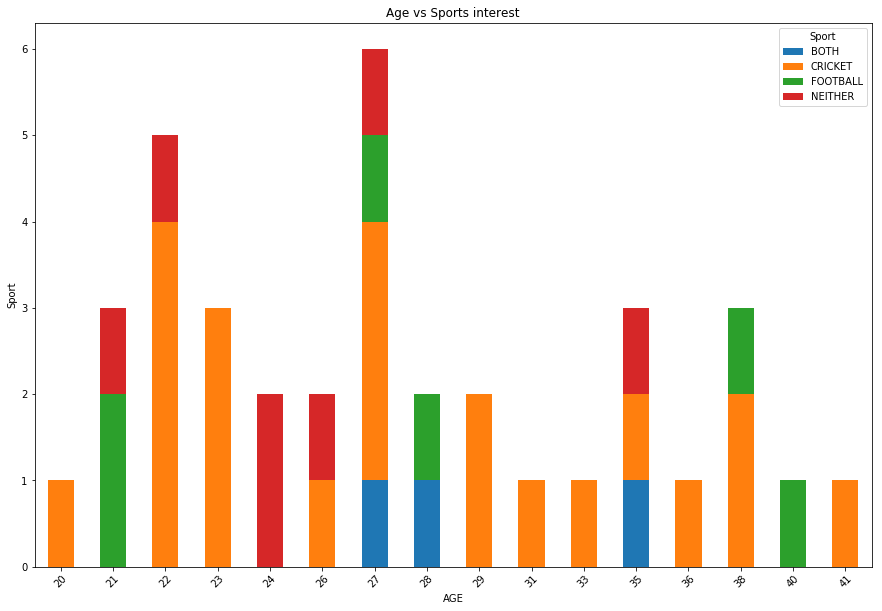

In [11]:
#Bar chart for age and food pref
re=data.groupby(['age','Sport'])['Sport'].count()
re.unstack().plot(kind='bar', stacked=True, figsize=(15,10))
plt.xlabel('AGE')
plt.ylabel('Sport')
plt.title('Age vs Sports interest')
plt.xticks(rotation=45)
plt.show()

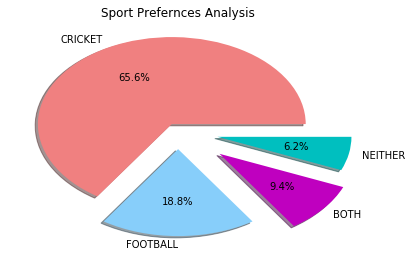

In [9]:
x = data[data['Sport'] == 'CRICKET']
y = data[data['Sport'] == 'FOOTBALL']
a = data[data['Sport'] == 'BOTH']
b = data[data['Sport'] == 'NEITHER']


labels = ["CRICKET","FOOTBALL",'BOTH','NEITHER' ]
sizes = [len(x),len(y), len(a), len(b)]
colors = ['lightcoral', 'lightskyblue', 'm', 'c']
explode = (0.1, 0.2, 0.4, 0.3)
plt.title('Sport Prefernces Analysis')
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True)
plt.show()

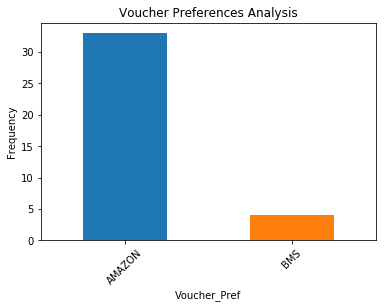

In [8]:
#plt.hist(data['Food_Pref'])
data['Voucher_Pref'].value_counts().plot(kind='bar')
plt.xlabel('Voucher_Pref')
plt.ylabel('Frequency')
plt.title('Voucher Preferences Analysis')
plt.xticks(rotation = 45)
plt.show()
